# **Problem :**
As part of a team of data scientists, you have been provided with a dataset and requested to develop a KNN model to predict whether someone has a potential risk of heart disease or not.

The dataset is in the form of a csv file called data-heart.csv. This dataset is available on the Moodle site under Week 11 Assessment. This dataset is complete, as it is, and therefore, there is no need to check for missing values or zero values.

**Your task is to create a KNN model and predict the potential risk of heart disease.**

### **Step-1:** Importing libraries

In [32]:
# --------------------
#  data manipulation
# --------------------
import pandas as pd
import numpy as np

# --------------------
#  data visualization
# --------------------
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------------------
#   Machine Learning: model selection, preprocessing, and model evaluation
# ---------------------------------------------------------------------------

# [1] split data into training and testing datasets
from sklearn.model_selection import train_test_split

# [2] featureScaling; to normalize the data
from sklearn.preprocessing import StandardScaler

# [3] define and fit the KNN model
from sklearn.neighbors import KNeighborsClassifier

# [4] evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

### **Step-2:** Loading and printing the dataset

In [33]:
# load the dataset
datapath = '/content/data-heart.csv'
df = pd.read_csv(datapath)

# check the length
print(len(df))

# print first 5 rows
print(df.head())

303
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


### **Step-3:** Identifying the features and target

In [34]:
# identifying features

# -- set all fields as a feature except the 'target'
x = df.drop(columns='target')
y = df['target']

### **Step-4:** Split the data

In [6]:
# spli the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 5)

### **Step-5:** Feature Scaling

In [35]:
# initialize the scaler
scaler = StandardScaler()

# scale the data between 0 and 1 for data consistency
# fit the scaler on the training data and transform both the training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# check the scaled data
print(x_train_scaled[:5])

[[ 0.07030624 -1.50674161 -0.97227182  2.75369729  1.61791953 -0.43159531
   2.76260089 -1.48892705  1.50674161  2.14467764 -0.65683133 -0.69043052
  -0.49747423]
 [-1.2729129  -1.50674161 -0.97227182  0.02536671  1.89152996  2.31698534
  -1.07963713 -0.64331359  1.50674161  1.78876337 -0.65683133 -0.69043052
   1.15168692]
 [-0.15356362  0.6636838   0.97227182 -0.08831373  0.03488775  2.31698534
  -1.07963713  1.00340736 -0.6636838  -0.88059368  0.98186126  2.31108179
  -0.49747423]
 [-0.93710811 -1.50674161 -0.97227182  0.36640803 -0.02374305 -0.43159531
  -1.07963713  0.06878196  1.50674161 -0.88059368 -0.65683133 -0.69043052
  -0.49747423]
 [-0.71323826 -1.50674161  0.97227182 -0.08831373  0.60165222 -0.43159531
   0.84148188 -0.50979567 -0.6636838  -0.70263655  0.98186126 -0.69043052
  -0.49747423]]


### **Step-6:** Find the optimal neighbour for KNN model

In [36]:
# start by checking the accuracy for values 1-20

# initializing the list to store accuracy
accuracy = []

# function to check the accuracy for values 1-20 and store them in a list
for k in range(1, 21):
    # define the KNN model with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # train the model on the training data
    knn.fit(x_train_scaled, y_train)

    # predict on the test data
    y_pred = knn.predict(x_test_scaled)

    # calculate accuracy and append to the list
    accuracy.append(accuracy_score(y_test, y_pred))


# function to get the max value and its index for any list
def get_max_index(list):
  for i in range(len(list)):
    if list[i] == max(list):
      return i, list[i]

# compare and give out the max accuracy and its index
get_max_index(accuracy)

(6, 0.9016393442622951)

- *Since we got the index 6 as the index with maximum accuracy, we will take the number of neighbours as **'7'** to define the model.*

- *This also lines up with the good practise of choosing odd numbers for neighbours.*

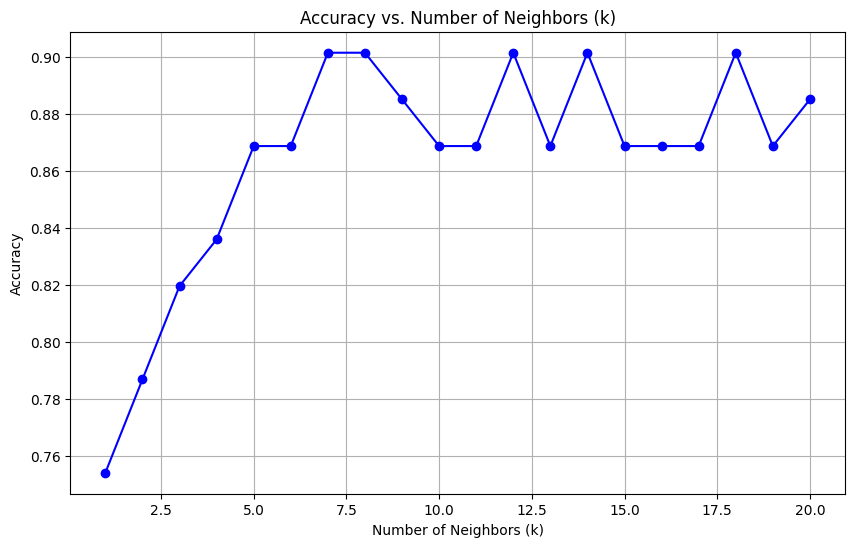

In [37]:
# plotting the accuracy for better visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

### **Step-7** Define and fit the KNN Model

In [38]:
# define the model
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric = 'euclidean')

# train the model
knn.fit(x_train_scaled, y_train)

# predict on the test set
y_pred = knn.predict(x_test_scaled)

# print the predictions
print("Predictions:", y_pred)
print("Actual labels:", y_test.values)

Predictions: [1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0]
Actual labels: [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0]


### **Step-8** Evaluate the model

Evaluation helps to understand how well the model is performing on the test data using key metrics:

- **Confusion Matrix**: Summarizes correct/incorrect predictions.
- **Accuracy**: Percentage of correct predictions.
- **Precision**: Proportion of true positives out of all predicted positives.
- **Recall**: Proportion of true positives out of all actual positives.
- **F1** Score: Harmonic mean of precision and recall.

Confusion Matrix:
 [[27  3]
 [ 3 28]]


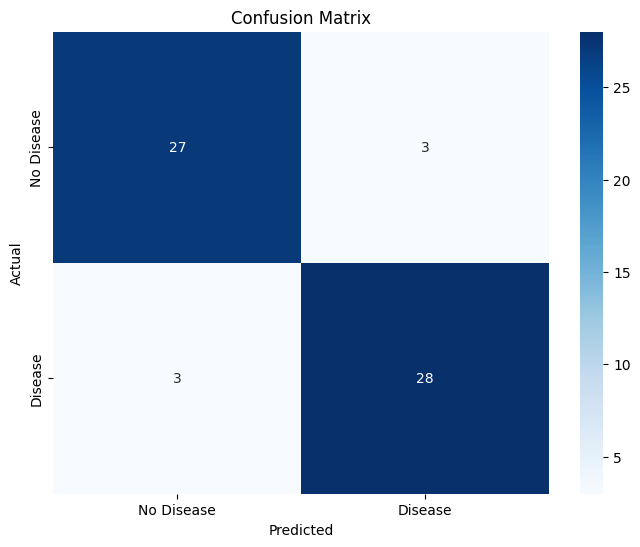

Accuracy: 0.9016393442622951

Classification Report:
               precision    recall  f1-score   support

  No Disease       0.90      0.90      0.90        30
     Disease       0.90      0.90      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [39]:
# generating the confusion matrix
cmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cmatrix)

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# compute other metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print a detailed classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print("\nClassification Report:\n", report)